<a href="https://colab.research.google.com/github/Sowmya-2348562/ADA-Sowmya/blob/main/ada_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/budget_2024_ada - budget_2024.csv (3).csv')
df.head()

,Post_ID,Username,User_Location,User_Followers_Count,User_Occupation,Post_Date,Post_Text,Hashtags,Key_Concern,Likes_Count,Retweets_Count,Comments_Count,Comments,User_Mentioned,Rating_Employment_Initiatives,Feedback_Employment,Preferred_Job_Sector
0,123456,Aarav_Tech_Guru,"Bangalore, Karnataka, India",5000,Technology Consultant,2024-02-16T10:30:00Z,Excited about the #DigitalIndia push in Budget...,"DigitalIndia,Budget2024,TechSector",digital,30,5,2,"{'Username': 'Ria_Designer', 'Text': 'Agreed, ...",Ria_Designer,8,"Good job, government! Let's focus on upskillin...",Technology
1,7891011,Meena_Farmer,"Village_Bhopal, Madhya_Pradesh, India",150,Farmer,2024-02-15T16:45:00Z,Disappointed that #Agriculture was overlooked ...,"Agriculture,Budget2024",agriculture,10,2,1,"{'Username': 'Raj_Farmer', 'Text': ""I agree, M...",Raj_Farmer,5,The government needs to prioritize the agricul...,Agriculture
2,1112233,Suresh_Engineer,"Chennai, Tamil_Nadu, India",1000,Engineer,2024-02-17T09:00:00Z,The #Infrastructure push in Budget 2024 is pro...,"Infrastructure,Budget2024",infrastructure,25,4,3,"{'Username': 'Revathy_Architect', 'Text': 'Hop...",Revathy_Architect,7,The infrastructure sector has great potential ...,Engineering
3,100001,AaravPatel_123,"Ahmedabad, Gujarat, India",5000,Software Engineer,2024-02-15T14:30:00Z,Excited about the new #digitalIndia initiative...,"digitalIndia,IndianBudget2024,techstartups,Mak...",digital,100,5,3,"{'Username': 'Neha_Mukherjee', 'Post_ID': 1000...",NaN,7,The focus on digital India initiatives is a st...,Tech Startups
4,100001,Rajesh_Garg_78,"New Delhi, India",15000,Engineer,2024-02-01T12:34:56Z,Budget 2024: A step forward for Indian economy...,"IndianBudget,Economy,Growth",economy,120,2,3,"{'Username': 'sneha_kumar', 'Post_Text': 'Agre...",finminindia,4,The initiatives towards skill development are ...,Engineering


In [ ]:
df.isnull().sum()

,0
Post_ID,0
Username,0
User_Location,0
User_Followers_Count,0
User_Occupation,0
Post_Date,0
Post_Text,0
Hashtags,0
Key_Concern,7
Likes_Count,5


In [ ]:
df.dtypes

,0
Post_ID,object
Username,object
User_Location,object
User_Followers_Count,object
User_Occupation,object
Post_Date,object
Post_Text,object
Hashtags,object
Key_Concern,object
Likes_Count,object


In [ ]:
df.columns

Index(['Post_ID', 'Username', 'User_Location', 'User_Followers_Count',
       'User_Occupation', 'Post_Date', 'Post_Text', 'Hashtags', 'Key_Concern',
       'Likes_Count', 'Retweets_Count', 'Comments_Count', 'Comments',
       'User_Mentioned', 'Rating_Employment_Initiatives',
       'Feedback_Employment', 'Preferred_Job_Sector'],
      dtype='object')

In [ ]:
most_common_feedback = df['Feedback_Employment'].mode()[0]
df['Feedback_Employment'].fillna(most_common_feedback, inplace=True)

most_common_feedback = df['Key_Concern'].mode()[0]
df['Key_Concern'].fillna(most_common_feedback, inplace=True)


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)

    # Word tokenization
    words = word_tokenize(text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in words)

    return text


In [ ]:
df['Feedback_Employment'] = df['Feedback_Employment'].apply(preprocess_text)
df['Key_Concern'] = df['Key_Concern'].apply(preprocess_text)
df['Post_Text'] = df['Post_Text'].apply(preprocess_text)
df['User_Occupation'] = df['User_Occupation'].apply(preprocess_text)


In [ ]:


from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
  blob = TextBlob(text)
  return blob.sentiment.polarity

# Apply sentiment analysis to the processed feedback
df['Sentiment'] = df['Feedback_Employment'].apply(get_sentiment)

# Analyze sentiment distribution
print(df['Sentiment'].describe())

# Categorize sentiment
def categorize_sentiment(score):
  if score > 0:
    return 'Positive'
  elif score < 0:
    return 'Negative'
  else:
    return 'Neutral'

df['Sentiment_Category'] = df['Sentiment'].apply(categorize_sentiment)

# Print sentiment counts
print(df['Sentiment_Category'].value_counts())


count    546.000000
mean       0.163388
std        0.238778
min       -0.750000
25%        0.000000
50%        0.100000
75%        0.244805
max        1.000000
Name: Sentiment, dtype: float64
Sentiment_Category
Positive    326
Neutral     200
Negative     20
Name: count, dtype: int64


In [ ]:
df['Sentiment_Category'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

<ipython-input-76-e695d1ef0929>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Category', data=df, palette='viridis')


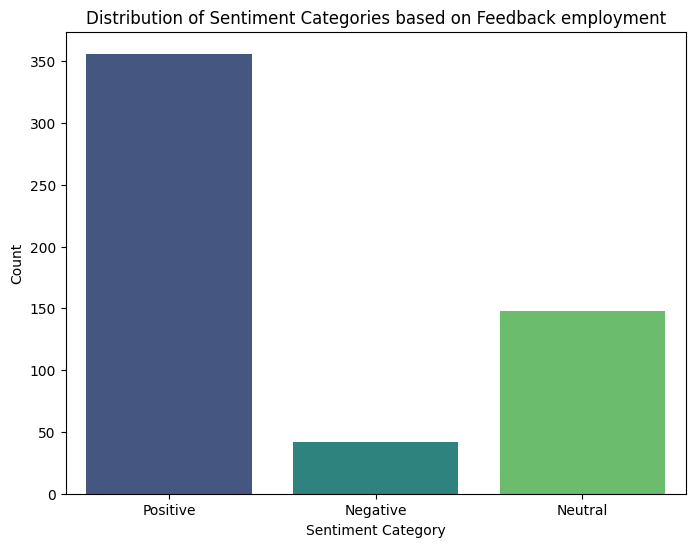

In [ ]:
# Visualize the distribution of sentiment categories
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as pltm
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_Category', data=df, palette='viridis')
plt.title('Distribution of Sentiment Categories based on Feedback employment')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

In [ ]:


from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
  blob = TextBlob(text)
  return blob.sentiment.polarity

# Apply sentiment analysis to the processed feedback
df['Sentiment'] = df['Post_Text'].apply(get_sentiment)

# Analyze sentiment distribution
print(df['Sentiment'].describe())

# Categorize sentiment
def categorize_sentiment(score):
  if score > 0:
    return 'Positive'
  elif score < 0:
    return 'Negative'
  else:
    return 'Neutral'

df['Sentiment_Category1'] = df['Sentiment'].apply(categorize_sentiment)

# Print sentiment counts
print(df['Sentiment_Category1'].value_counts())


count    546.000000
mean       0.197094
std        0.292572
min       -0.750000
25%        0.000000
50%        0.200000
75%        0.375000
max        1.000000
Name: Sentiment, dtype: float64
Sentiment_Category1
Positive    356
Neutral     148
Negative     42
Name: count, dtype: int64


<ipython-input-78-aab06a5979fa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Category1', data=df, palette='viridis')


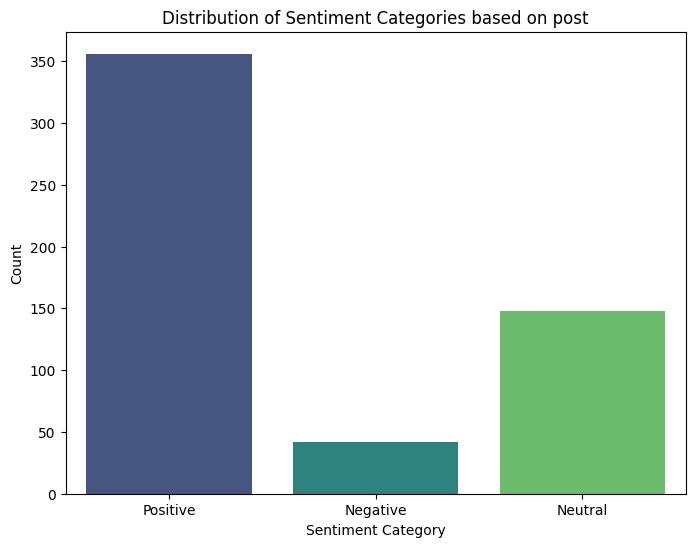

In [ ]:
# Visualize the distribution of sentiment categories
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as pltm
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_Category1', data=df, palette='viridis')
plt.title('Distribution of Sentiment Categories based on post')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

In [ ]:
#Calculate the length of each feedback
df['Feedback_Length'] = df['Feedback_Employment'].apply(lambda x: len(x.split()))


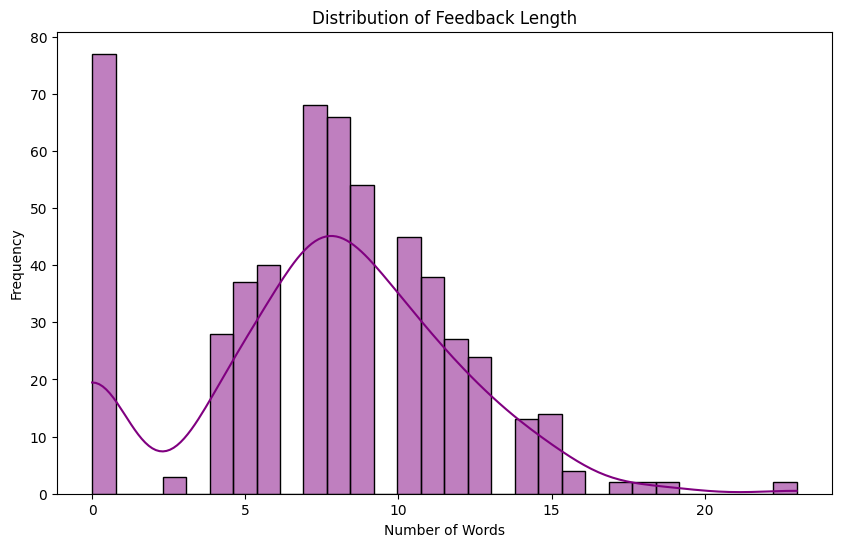

In [ ]:
# Visualize the distribution of feedback length
plt.figure(figsize=(10, 6))
sns.histplot(df['Feedback_Length'], kde=True, bins=30, color='purple')
plt.title('Distribution of Feedback Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

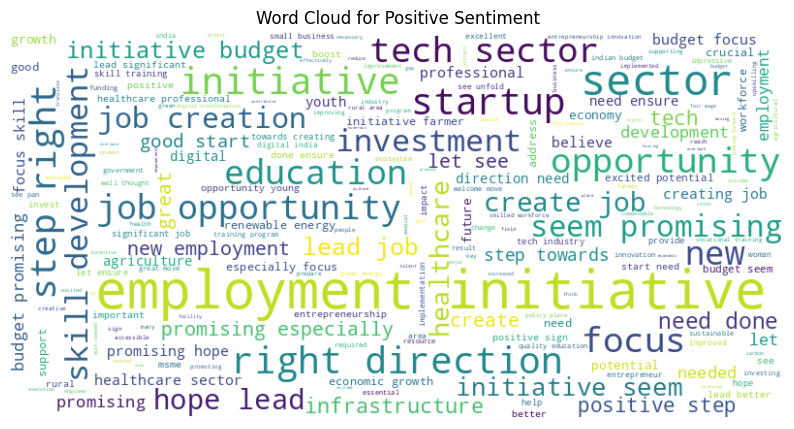

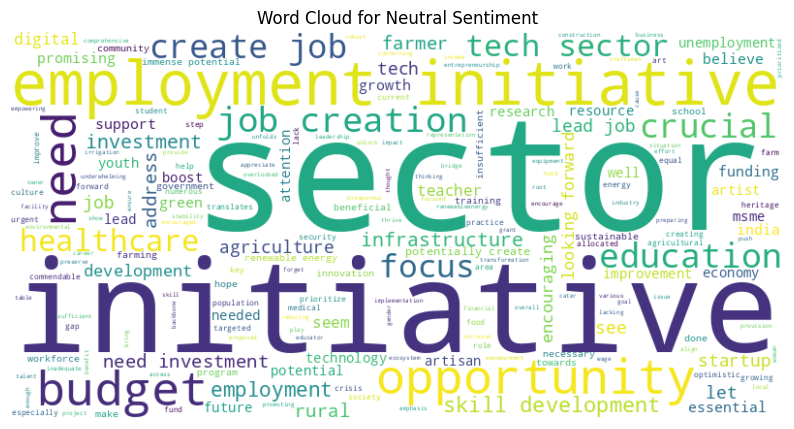

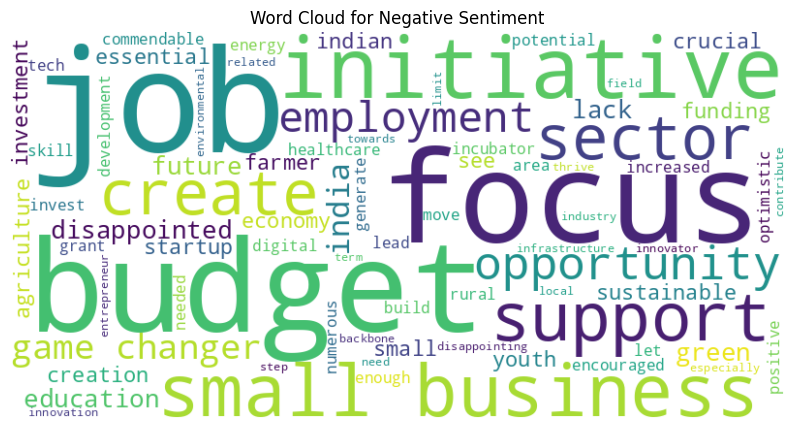

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment category
for sentiment in df['Sentiment_Category'].unique():
    plt.figure(figsize=(10, 6))
    text = ' '.join(df[df['Sentiment_Category'] == sentiment]['Feedback_Employment'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

In [ ]:
df['Key_Concern']

,Key_Concern
0,digital
1,agriculture
2,infrastructure
3,digital
4,economy
...,...
541,
542,
543,
544,


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
vectorizer = CountVectorizer(max_features=10, stop_words='english')

X = vectorizer.fit_transform(df['Key_Concern'])

# Convert to DataFrame for easier analysis
keywords_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the most common keywords
print(keywords_df.sum().sort_values(ascending=False))

employment     90
budget         68
digital        53
education      41
startup        37
healthcare     37
agriculture    36
sector         32
initiative     25
positive       20
dtype: int64


Sentiment Distribution for Education:
Sentiment_Category
Positive    21
Neutral      7
Negative     1
Name: count, dtype: int64
The most prevalent sentiment for education is: Positive


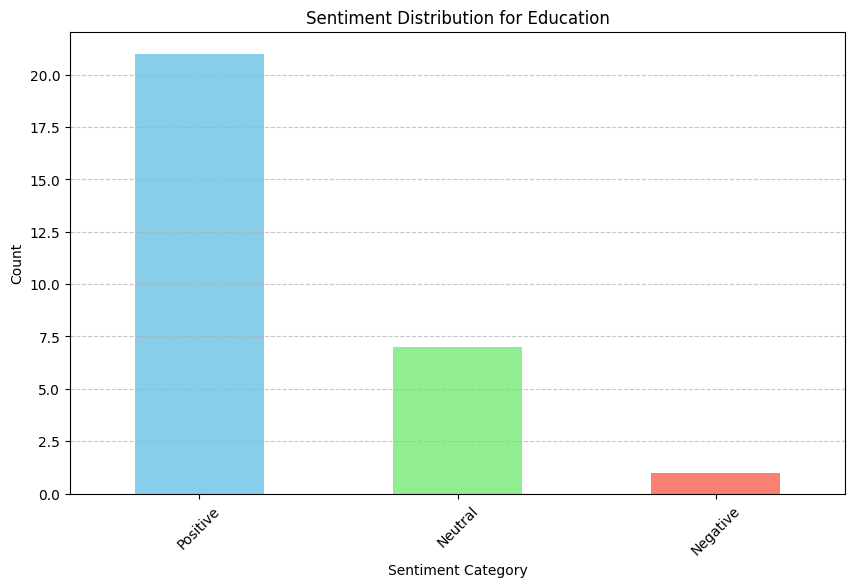

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a dataframe named df with 'Key_Concern' and 'Sentiment_Category' columns

# Filter the dataframe for rows where the Key_Concern is 'education'
education_df = df[df['Key_Concern'] == 'education']

# Count the occurrences of each sentiment category
sentiment_counts = education_df['Sentiment_Category'].value_counts()

# Identify the sentiment with the highest count
most_common_sentiment = sentiment_counts.idxmax()

print("Sentiment Distribution for Education:")
print(sentiment_counts)
print(f"The most prevalent sentiment for education is: {most_common_sentiment}")

# Plot the bar chart
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Sentiment Distribution for Education')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Sentiment Distribution for employment:
Sentiment_Category
Positive    42
Neutral     30
Negative     1
Name: count, dtype: int64
The most prevalent sentiment for employment is: Positive


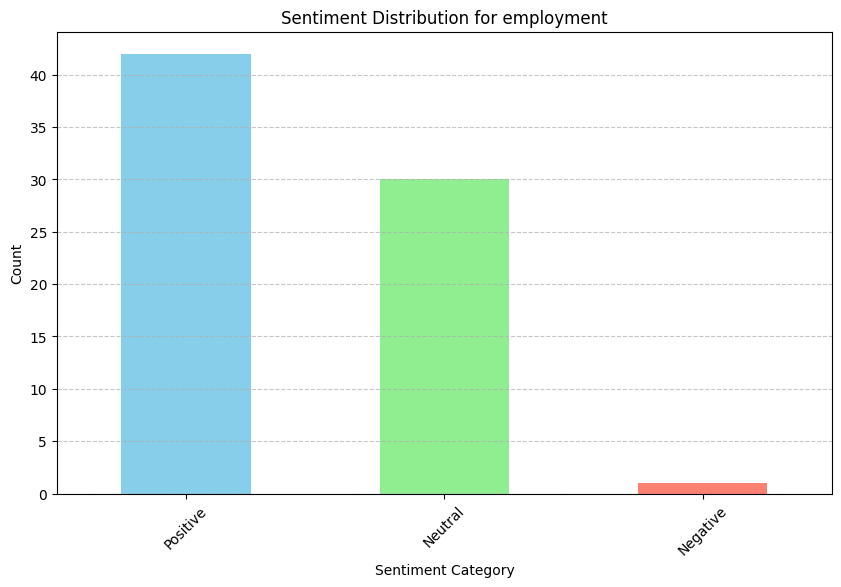

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a dataframe named df with 'Key_Concern' and 'Sentiment_Category' columns

# Filter the dataframe for rows where the Key_Concern is 'education'
education_df = df[df['Key_Concern'] == 'employment']

# Count the occurrences of each sentiment category
sentiment_counts = education_df['Sentiment_Category'].value_counts()

# Identify the sentiment with the highest count
most_common_sentiment = sentiment_counts.idxmax()

print("Sentiment Distribution for employment:")
print(sentiment_counts)
print(f"The most prevalent sentiment for employment is: {most_common_sentiment}")

# Plot the bar chart
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Sentiment Distribution for employment')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Make sure to download necessary NLTK data files if you haven't already
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove non-alphanumeric characters (retain only letters and numbers)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)

    # Word tokenization
    words = word_tokenize(text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in words)

    return text

# Apply the preprocess_text function to the 'Post_Text' column
df['Processed_Text'] = df['Post_Text'].apply(preprocess_text)

# Display the first few rows of the dataframe
print(df[['Post_Text', 'Processed_Text']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                           Post_Text  \
0  Excited about the #DigitalIndia push in Budget...   
1  Disappointed that #Agriculture was overlooked ...   
2  The #Infrastructure push in Budget 2024 is pro...   
3  Excited about the new #digitalIndia initiative...   
4  Budget 2024: A step forward for Indian economy...   

                                      Processed_Text  
0  excited digitalindia push budget let see impac...  
1  disappointed agriculture overlooked budget sec...  
2  infrastructure push budget promising let see t...  
3  excited new digitalindia initiative indianbudg...  
4  budget step forward indian economy kudos finmi...  


In [ ]:
import re
from transformers import pipeline

# Function to extract sentences containing the keywords
def extract_relevant_sentences(text, keywords):
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    relevant_sentences = [sentence for sentence in sentences if any(keyword in sentence for keyword in keywords)]
    return ' '.join(relevant_sentences)

# Apply the function to extract sentences containing "job" and "education"
keywords = ['job', 'education']
df['Relevant_Sentences'] = df['Processed_Text'].apply(lambda x: extract_relevant_sentences(x, keywords))

# Combine all the relevant sentences into a single string
combined_text = ' '.join(df['Relevant_Sentences'].dropna())

# Load the summarization pipeline
summarizer = pipeline('summarization', model='sshleifer/distilbart-cnn-12-6')

# Function to split text into smaller chunks
def split_text_into_chunks(text, chunk_size=512):
    words = text.split()
    return [' '.join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]

# Split the combined text into smaller chunks
text_chunks = split_text_into_chunks(combined_text)

# Generate summaries for each chunk and combine them
summaries = [summarizer(chunk, max_length=25, min_length=10, do_sample=False)[0]['summary_text'] for chunk in text_chunks]

# Combine all the summaries into a final summary
final_summary = ' '.join(summaries)

# Display the final summary
print("Final Summary of all relevant sentences:")
print(final_summary)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Final Summary of all relevant sentences:
 Indian budget taken positive step towards education let invest future generation educationforall employment excited see focus digitalindia  see focus digitalindia startup indianbudget let make india global tech hub makeinindia jobsfor  budget hope create job tech sector makeinindia startupindia jobsforyouth excited see focus digitalind  Indian budget unveiled focus several key areas job creation remains major concern estimated million job lost due pandemic need effective  budget budget budget startup startup innovation im excited potential job opportunity could bring modioffice . Budget budget startup innovation  Indian budget could lead job opportunity construction sector employmentinitiatives infrastructuredevelopment budget left


In [ ]:
pip install nltk summa bert-extractive-summarizer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54389 sha256=a8b7b4f16c10039e182a65115b51f8b301d1cb588401cd8b010d07d9ad49693a
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
Successfully built summa


In [ ]:
!pip install sumy


In [ ]:
!pip install nltk


In [ ]:
import re
import pandas as pd
from nltk.tokenize import sent_tokenize
from summarizer import Summarizer

# Assuming you have already loaded and preprocessed your DataFrame 'df'

# Function to extract sentences containing the keywords
def extract_relevant_sentences(text, keywords):
    sentences = sent_tokenize(text)
    relevant_sentences = [sentence for sentence in sentences if any(keyword in sentence.lower() for keyword in keywords)]
    return ' '.join(relevant_sentences)

# Apply the function to extract sentences containing "job" and "education"
keywords = ['job', 'education']
df['Relevant_Sentences'] = df['Post_Text'].apply(lambda x: extract_relevant_sentences(x, keywords))

# Combine all the relevant sentences into a single string
combined_text = ' '.join(df['Relevant_Sentences'].dropna())

# BERT Extractive Summarizer
bert_model = Summarizer()
bert_summary = ''.join(bert_model(combined_text, min_length=60))
print("BERT Summary:")
print(bert_summary)


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


BERT Summary:
MakeInIndia #JobsForYouth  Hope this leads to more job opportunities. The #IndianBudget2024 has taken a positive step towards education. # StartupsIndia #JobCreation #DigitalIndia   The #IndiaBudget2024's emphasis on education is commendable. # Excited to see the focus on green jobs and renewable energy in this year's budget. DigitalIndia #Education #YouthEmpowerment  Let's hope this leads to better facilities and more job opportunities. The #IndianBudget2024's investment in #EducationSector is a step towards a brighter future for our youth. # Healthcare #Education #SocialServices     The Indian budget 2024 focuses on education, which is a positive sign. Budget2024 #Education #SkillDevelopment    I hope it leads to more job opportunities for young tech enthusiasts like me. Let's hope this leads to more job opportunities for the youth. # Budget2024 #StartupsIndia #JobCreation #TechInnovation  I'm excited to see the positive impact on job creation and innovation. Looking fo

In [ ]:
from summarizer import Summarizer

bert_model = Summarizer()
bert_summary = ''.join(bert_model(text, min_length=60))
print("BERT Summary:")
print(bert_summary)

The Indian Budget 2024 has sparked a broad discussion on its emphasis on education, job creation, and digital innovation. Many are hopeful that the budget will lead to increased job opportunities, especially in sectors like technology, renewable energy, and green jobs. The focus on education and skill development is seen as a positive step toward youth empowerment and economic growth. However, there are concerns that more needs to be done, particularly in areas like teacher support and school infrastructure. Overall, the budget is viewed as a move towards fostering job creation, but the effectiveness of these initiatives remains to be seen.


In [ ]:
# Most common feedback
common_feedback = df['Feedback_Employment'].value_counts().head(3)
print(common_feedback)

# Sentiment distribution for top feedback categories
top_feedback = common_feedback.index.tolist()
sentiment_by_feedback = df[df['Feedback_Employment'].isin(top_feedback)].groupby('Feedback_Employment')['Sentiment_Category'].value_counts(normalize=True).unstack().fillna(0)
print(sentiment_by_feedback)



Feedback_Employment
                                                                                                                  77
new initiative sector promising especially focus digital india startup hope lead job opportunity growth sector     2
employment initiative seem promising especially tech related job                                                   2
Name: count, dtype: int64
Sentiment_Category                                  Neutral  Positive
Feedback_Employment                                                  
                                                        1.0       0.0
employment initiative seem promising especially...      0.0       1.0
new initiative sector promising especially focu...      0.0       1.0


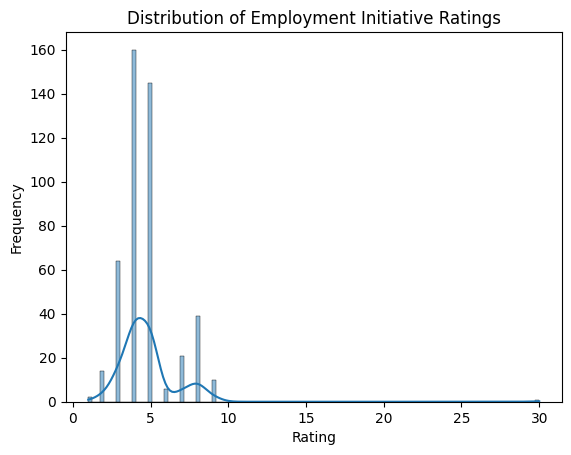

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to numeric if necessary (in case of categorical values stored as objects)
df['Rating_Employment_Initiatives'] = pd.to_numeric(df['Rating_Employment_Initiatives'], errors='coerce')

# Distribution of ratings
sns.histplot(df['Rating_Employment_Initiatives'].dropna(), kde=True)
plt.title('Distribution of Employment Initiative Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


<ipython-input-70-cbf95609819f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_sectors.values, y=top_10_sectors.index, palette='magma')


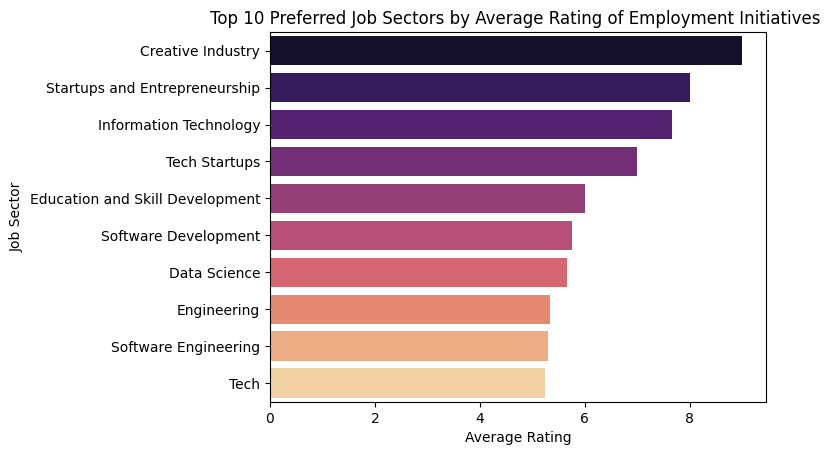

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by preferred job sector and calculate the mean rating
sector_rating = df.groupby('Preferred_Job_Sector')['Rating_Employment_Initiatives'].mean()

# Sort values in descending order and select the top 10
top_10_sectors = sector_rating.sort_values(ascending=False).head(10)

# Bar plot of average ratings for the top 10 sectors
sns.barplot(x=top_10_sectors.values, y=top_10_sectors.index, palette='magma')
plt.title('Top 10 Preferred Job Sectors by Average Rating of Employment Initiatives')
plt.xlabel('Average Rating')
plt.ylabel('Job Sector')
plt.show()


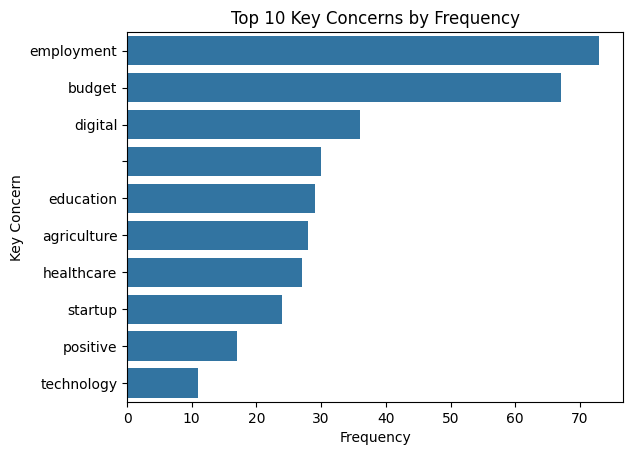

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by key concerns and count the frequency
concern_frequency = df['Key_Concern'].value_counts()

# Select the top 10 concerns
top_10_concerns = concern_frequency.head(10)

# Bar plot of top 10 key concerns by frequency
sns.barplot(x=top_10_concerns.values, y=top_10_concerns.index,)
plt.title('Top 10 Key Concerns by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Key Concern')
plt.show()


<ipython-input-82-1ea983c489a9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_occupations.values, y=top_10_occupations.index, palette='magma')


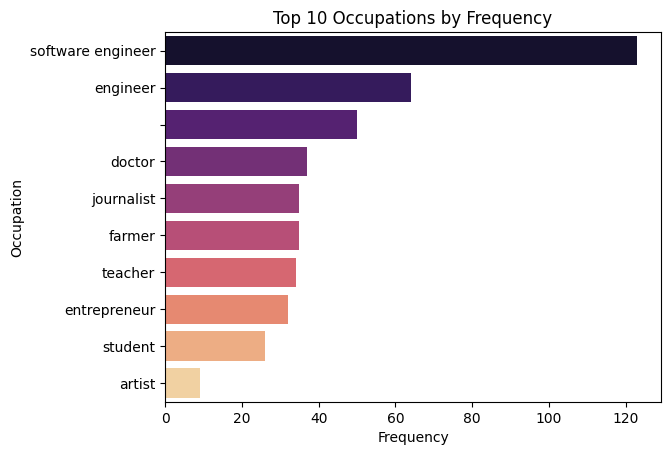

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Count the frequency of each occupation
occupation_frequency = df['User_Occupation'].value_counts()

# Select the top 10 occupations
top_10_occupations = occupation_frequency.head(10)

# Bar plot of the top 10 occupations by frequency
sns.barplot(x=top_10_occupations.values, y=top_10_occupations.index, palette='magma')
plt.title('Top 10 Occupations by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Occupation')
plt.show()
